# Cluster Analysis

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
variables = pd.read_csv('Census_neighborhoods_UDP_condensed.csv')

In [3]:
variables
variables.reset_index()

,index,Unnamed: 0,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,0,0,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037210e+09,Advanced Gentrification,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,1,1,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037209e+09,Early/Ongoing Gentrification,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,2,2,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037211e+09,Early/Ongoing Gentrification,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,3,3,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,4,4,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037208e+09,At Risk of Gentrification,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,128,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037221e+09,Low-Income/Susceptible to Displacement,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381
129,129,129,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037221e+09,At Risk of Gentrification,0.096346,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893
130,130,130,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,Advanced Gentrification,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
131,131,131,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,At Risk of Gentrification,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598


In [4]:
variables = variables.drop(columns={'Unnamed: 0'})

In [5]:
type(variables)

pandas.core.frame.DataFrame

In [6]:
variables.geometry

0      POLYGON ((-118.259080190068 34.0538938556827, ...
1      POLYGON ((-118.259080190068 34.0538938556827, ...
2      POLYGON ((-118.259080190068 34.0538938556827, ...
3      POLYGON ((-118.259080190068 34.0538938556827, ...
4      POLYGON ((-118.259080190068 34.0538938556827, ...
                             ...                        
128    POLYGON ((-118.281458193635 34.0525018538312, ...
129    POLYGON ((-118.281458193635 34.0525018538312, ...
130    POLYGON ((-118.281458193635 34.0525018538312, ...
131    POLYGON ((-118.281458193635 34.0525018538312, ...
132    POLYGON ((-118.281458193635 34.0525018538312, ...
Name: geometry, Length: 133, dtype: object

In [7]:
variables['geometry'] = gpd.GeoSeries.from_wkt(variables['geometry'])
variablesGdf = gpd.GeoDataFrame(variables, geometry='geometry')

In [8]:
type(variablesGdf)

geopandas.geodataframe.GeoDataFrame

In [9]:
variablesGdf.groupby('name').size()

name
Downtown       10
Echo Park      16
Koreatown      36
Pico-Union     22
Silver Lake    25
Westlake       24
dtype: int64

In [10]:
variablesGdf.groupby('Typology').size()

Typology
Advanced Gentrification                   37
At Risk of Gentrification                 13
Becoming Exclusive                         3
Early/Ongoing Gentrification              46
Low-Income/Susceptible to Displacement    15
Ongoing Displacement                      12
Stable Moderate/Mixed Income               5
Stable/Advanced Exclusive                  1
Unavailable or Unreliable Data             1
dtype: int64

## Clustering

In [11]:
variablesGdf2 = variablesGdf.drop(columns={'name', 'geometry', 'GEOID', 'Typology'})

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf2)
print(kmeans)

KMeans(n_clusters=5, random_state=0)


In [14]:
kmeans.labels_

array([3, 3, 3, 4, 1, 0, 1, 0, 3, 3, 3, 3, 0, 3, 4, 4, 1, 4, 4, 3, 0, 3,
       3, 3, 0, 0, 4, 0, 0, 4, 2, 3, 3, 4, 4, 0, 3, 3, 4, 1, 3, 4, 3, 1,
       0, 4, 4, 1, 0, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 1, 3, 4, 3, 0, 3, 1,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       3, 4, 0, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3,
       4, 3, 0, 2, 3, 1, 0, 0, 3, 3, 3, 4, 0, 3, 4, 3, 3, 0, 1, 3, 0, 3,
       0], dtype=int32)

In [15]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(133,)
133


In [16]:
variablesGdf['cluster_id'] = kmeans.labels_

In [17]:
variablesGdf.groupby('cluster_id').size()

cluster_id
0    22
1    10
2     2
3    66
4    33
dtype: int64

In [18]:
variablesGdf

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,3
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,3
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,3
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,4
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Low-Income/Susceptible to Displacement,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381,1
129,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.096346,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893,3
130,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,0
131,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,3


In [19]:
cluster0 = variablesGdf[variablesGdf['cluster_id']==0]

In [20]:
print(len(cluster0))

22


In [21]:
cluster0[cluster0['name']=='Westlake']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
5,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,Ongoing Displacement,-0.027322,0.315297,-0.030892,0.602603,-0.006260,0.279793,-0.206427,2.566729,0.251343,0
7,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037196e+09,Advanced Gentrification,0.064151,0.632568,0.202873,0.896234,-0.072710,0.514278,-0.259493,1.844775,0.574250,0
12,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,At Risk of Gentrification,-0.076220,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294,0
20,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Advanced Gentrification,-0.175595,0.519802,0.119788,1.201080,0.260274,0.757720,0.006419,1.695640,0.070955,0


In [22]:
cluster0[cluster0['name']=='Echo Park']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
35,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Early/Ongoing Gentrification,-0.170000,0.865362,0.374396,0.729159,0.699258,0.380857,0.356979,1.094552,1.199726,0
44,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037208e+09,Ongoing Displacement,-0.027322,0.315297,-0.030892,0.602603,-0.006260,0.279793,-0.206427,2.566729,0.251343,0
48,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification,0.064151,0.632568,0.202873,0.896234,-0.072710,0.514278,-0.259493,1.844775,0.574250,0


In [23]:
cluster0[cluster0['name']=='Koreatown']

,name,geometry,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
90,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,At Risk of Gentrification,-0.007752,0.422283,0.047936,0.291926,0.087886,0.031695,-0.131246,1.721897,1.878946,0


In [24]:
cluster0.groupby('name').size()

name
Downtown       4
Echo Park      3
Koreatown      1
Pico-Union     7
Silver Lake    3
Westlake       4
dtype: int64

In [25]:
cluster0.groupby('Typology').size()

Typology
Advanced Gentrification                   7
At Risk of Gentrification                 5
Early/Ongoing Gentrification              4
Low-Income/Susceptible to Displacement    3
Ongoing Displacement                      3
dtype: int64

In [26]:
cluster1 = variablesGdf[variablesGdf['cluster_id']==1]

In [27]:
cluster1.groupby('name').size()

name
Echo Park      3
Pico-Union     2
Silver Lake    2
Westlake       3
dtype: int64

In [28]:
cluster1.groupby('Typology').size()

Typology
Advanced Gentrification                   3
At Risk of Gentrification                 2
Early/Ongoing Gentrification              3
Low-Income/Susceptible to Displacement    1
Ongoing Displacement                      1
dtype: int64

In [29]:
cluster2 = variablesGdf[variablesGdf['cluster_id']==2]

In [30]:
cluster2.groupby('name').size()

name
Downtown      1
Pico-Union    1
dtype: int64

In [31]:
cluster2.groupby('Typology').size()

Typology
Ongoing Displacement    2
dtype: int64

In [32]:
cluster3 = variablesGdf[variablesGdf['cluster_id']==3]

In [33]:
cluster3.groupby('name').size()

name
Downtown        2
Echo Park       5
Koreatown      24
Pico-Union     10
Silver Lake    13
Westlake       12
dtype: int64

In [34]:
cluster3.groupby('Typology').size()

Typology
Advanced Gentrification                   15
At Risk of Gentrification                  3
Becoming Exclusive                         3
Early/Ongoing Gentrification              27
Low-Income/Susceptible to Displacement     9
Ongoing Displacement                       3
Stable Moderate/Mixed Income               4
Stable/Advanced Exclusive                  1
Unavailable or Unreliable Data             1
dtype: int64

In [35]:
cluster4 = variablesGdf[variablesGdf['cluster_id']==4]

In [36]:
cluster4.groupby('name').size()

name
Downtown        3
Echo Park       5
Koreatown      11
Pico-Union      2
Silver Lake     7
Westlake        5
dtype: int64

In [37]:
cluster4.groupby('Typology').size()

Typology
Advanced Gentrification                   12
At Risk of Gentrification                  3
Early/Ongoing Gentrification              12
Low-Income/Susceptible to Displacement     2
Ongoing Displacement                       3
Stable Moderate/Mixed Income               1
dtype: int64

In [38]:
import seaborn as sns
#ax = sns.pairplot(variablesGdf, hue='cluster_id', )

In [39]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [40]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

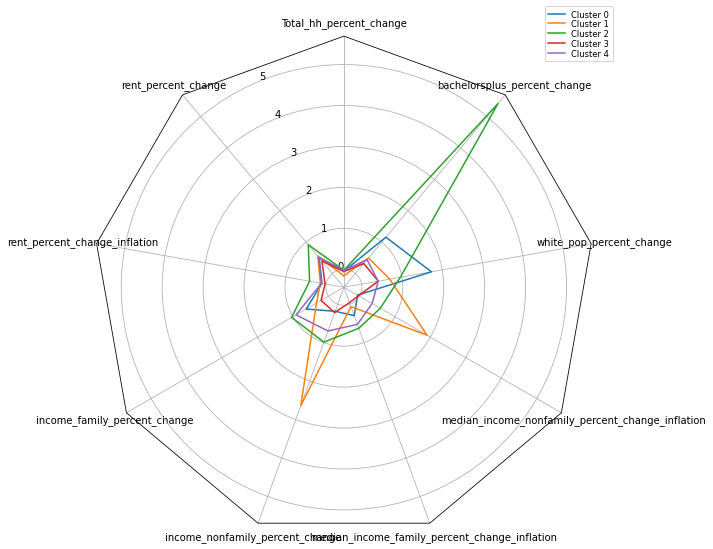

In [41]:
radar_plot (kmeans, variablesGdf2)

## Mapping Clusters

In [42]:
census_tracts = gpd.read_file('Census_Tracts_2020.geojson')
census_tracts

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."
...,...,...,...,...,...,...
2490,2491,980035,9800.35,1.716394e+08,107459.157092,"POLYGON ((-117.98268 34.04469, -117.98287 34.0..."
2491,2492,980036,9800.36,9.425460e+07,67746.068379,"POLYGON ((-118.07027 34.05725, -118.07073 34.0..."
2492,2493,980037,9800.37,1.402219e+07,15116.000420,"POLYGON ((-118.28411 33.80773, -118.28447 33.8..."
2493,2494,980038,9800.38,4.861673e+07,42991.767229,"POLYGON ((-118.36674 34.01539, -118.36673 34.0..."


In [43]:
census_tracts['GEOID'] ='6037' + census_tracts['CT20']
census_tracts.GEOID

0       6037101110
1       6037101122
2       6037101220
3       6037101221
4       6037101222
           ...    
2490    6037980035
2491    6037980036
2492    6037980037
2493    6037980038
2494    6037980039
Name: GEOID, Length: 2495, dtype: object

In [44]:
census_tracts['GEOID'] = census_tracts.GEOID.astype(float)

In [45]:
variablesGdf_final = variablesGdf.merge(
    census_tracts, 
    on=["GEOID"], 
    how="left",
    indicator=True,
)
variablesGdf_final

,name,geometry_x,GEOID,Typology,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,...,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry_y,_merge
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,...,0.648831,0.916215,3,639,210010,2100.10,4.402120e+06,8907.430264,"POLYGON ((-118.27259 34.04308, -118.27243 34.0...",both
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,...,-0.126527,0.011439,3,631,209300,2093.00,3.297116e+06,7931.222369,"POLYGON ((-118.26652 34.04788, -118.26642 34.0...",both
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,...,0.899744,0.113059,3,642,211122,2111.22,3.934734e+06,8274.051868,"POLYGON ((-118.29051 34.07633, -118.29170 34.0...",both
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,...,0.545329,0.577466,4,501,192700,1927.00,5.717757e+06,9614.054322,"POLYGON ((-118.28442 34.07715, -118.28442 34.0...",both
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,...,0.975671,0.734777,1,611,208302,2083.02,4.735707e+06,9852.781004,"POLYGON ((-118.25966 34.06201, -118.25974 34.0...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,Low-Income/Susceptible to Displacement,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,...,-0.411594,0.563381,1,741,221120,2211.20,3.417543e+06,7524.851759,"POLYGON ((-118.28413 34.04184, -118.28414 34.0...",both
129,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.096346,0.510638,0.113036,0.497703,-1.000000,0.196023,...,0.270798,0.645893,3,740,221110,2211.10,2.521209e+06,6926.353804,"POLYGON ((-118.28414 34.04729, -118.28534 34.0...",both
130,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,...,1.007048,0.903833,0,638,209820,2098.20,1.927868e+06,5690.534786,"POLYGON ((-118.27668 34.04519, -118.27651 34.0...",both
131,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,...,0.229048,0.036598,3,637,209810,2098.10,1.612738e+06,5415.906958,"POLYGON ((-118.28041 34.04819, -118.28061 34.0...",both


In [46]:
variablesGdf_final = variablesGdf_final.drop(columns=['geometry_x', 'OBJECTID', 'CT20','LABEL', 'ShapeSTArea','ShapeSTLength', '_merge'])

In [47]:
variablesGdf_final = variablesGdf_final.rename(columns={'geometry_y':'geometry'})

In [48]:
type(variablesGdf_final)

pandas.core.frame.DataFrame

In [49]:
from geopandas import GeoDataFrame
variablesGdf_final = GeoDataFrame(variablesGdf_final, crs="EPSG:3857", geometry='geometry')

In [50]:
type(variablesGdf_final)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

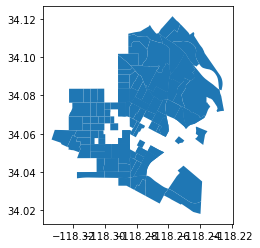

In [51]:
variablesGdf_final.plot()

Text(0.5, 1.0, 'Clusters of Gentrification Indicators')

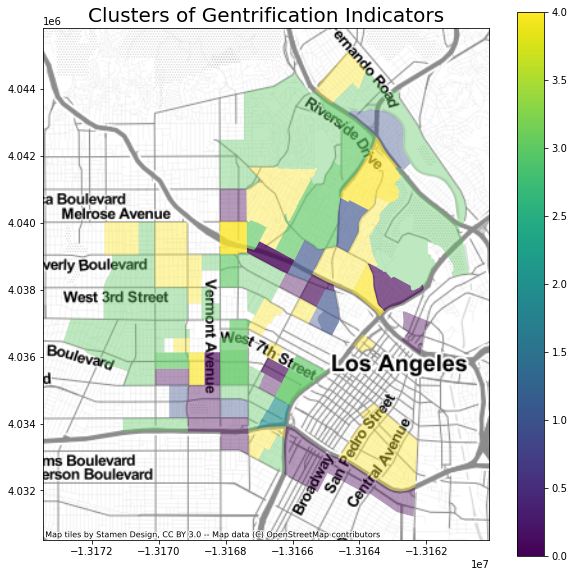

In [52]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax.set_title('Clusters of Gentrification Indicators', fontsize=20)

In [53]:
variablesGdf_final.groupby('Typology').size()

Typology
Advanced Gentrification                   37
At Risk of Gentrification                 13
Becoming Exclusive                         3
Early/Ongoing Gentrification              46
Low-Income/Susceptible to Displacement    15
Ongoing Displacement                      12
Stable Moderate/Mixed Income               5
Stable/Advanced Exclusive                  1
Unavailable or Unreliable Data             1
dtype: int64

In [54]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology']

In [55]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Advanced Gentrification'],
                                                                                        '8')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['At Risk of Gentrification'],
                                                                                        '7')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Becoming Exclusive'],
                                                                                        '6')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Early/Ongoing Gentrification'],
                                                                                        '5')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Low-Income/Susceptible to Displacement'],
                                                                                        '4')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Ongoing Displacement'],
                                                                                        '3')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Stable Moderate/Mixed Income'],
                                                                                        '2')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Stable/Advanced Exclusive'],
                                                                                        '1')
variablesGdf_final['Typology_numeric'] = variablesGdf_final['Typology_numeric'].replace(['Unavailable or Unreliable Data'],
                                                                                        '0')

In [56]:
variablesGdf_final['Typology_numeric'] = variablesGdf_final.Typology_numeric.astype(float)

Text(0.5, 1.0, 'Urban Displacement Project: Displacement Risk Index')

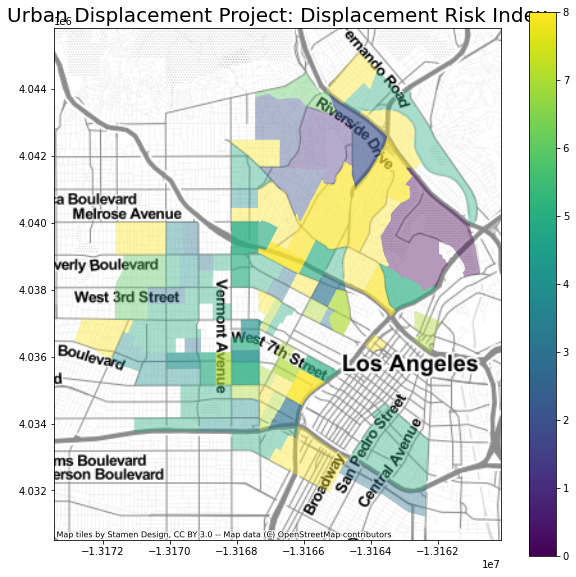

In [57]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric', legend=True, ax = ax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax.set_title('Urban Displacement Project: Displacement Risk Index', fontsize=20)

Text(0.5, 1.0, 'Urban Displacement Project')

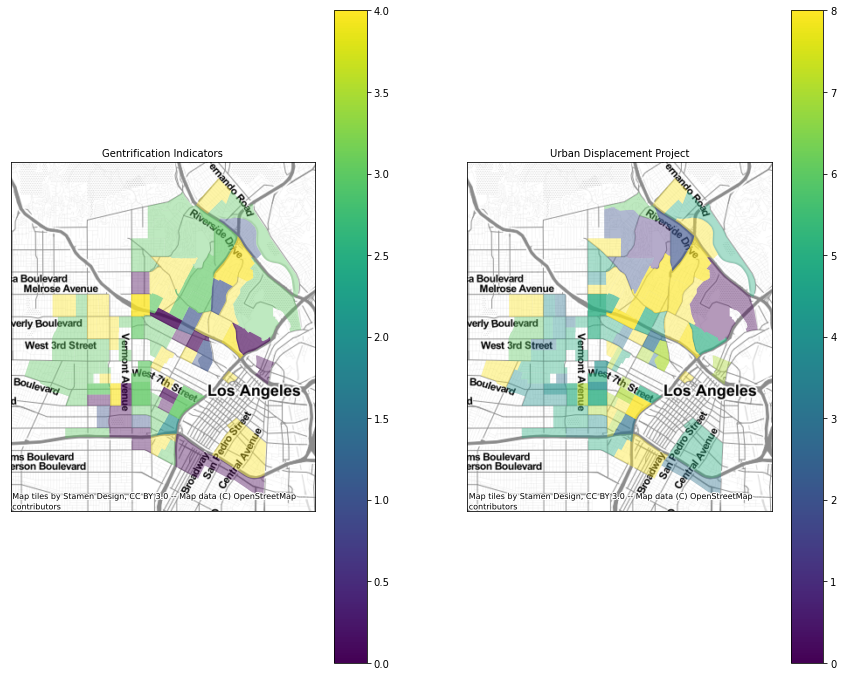

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Gentrification Indicators', fontsize=10)


variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project', fontsize=10)

In [59]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology']

In [60]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Advanced Gentrification'],
                                                                                        '4')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['At Risk of Gentrification'],
                                                                                        '4')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Becoming Exclusive'],
                                                                                        '3')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Early/Ongoing Gentrification'],
                                                                                        '3')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Low-Income/Susceptible to Displacement'],
                                                                                        '2')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Ongoing Displacement'],
                                                                                        '2')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Stable Moderate/Mixed Income'],
                                                                                        '1')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Stable/Advanced Exclusive'],
                                                                                        '1')
variablesGdf_final['Typology_numeric2'] = variablesGdf_final['Typology_numeric2'].replace(['Unavailable or Unreliable Data'],
                                                                                        '0')

In [61]:
variablesGdf_final['Typology_numeric2'] = variablesGdf_final.Typology_numeric2.astype(float)

Text(0.5, 1.0, 'Urban Displacement Project')

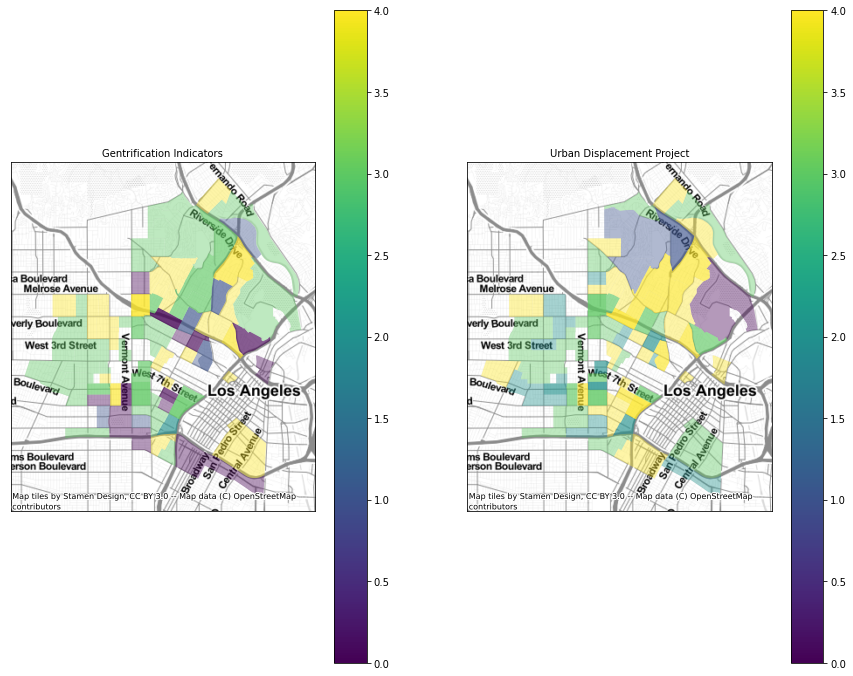

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Gentrification Indicators', fontsize=10)


variablesGdf_final.to_crs('EPSG:3857').plot('Typology_numeric2', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project', fontsize=10)

## Cluster Round 2

In [63]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(variablesGdf2)

In [64]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(133,)
133


In [65]:
variablesGdf2['cluster_id2'] = kmeans.labels_

In [66]:
variablesGdf2.groupby('cluster_id2').size()

cluster_id2
0    10
1    13
2    31
3     8
4     7
5    18
6    33
7    10
8     2
9     1
dtype: int64

In [67]:
variablesGdf2

,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id2
0,-0.090301,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,2
1,-0.139194,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,6
2,0.003922,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,2
3,0.060714,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,5
4,-0.051724,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,3
...,...,...,...,...,...,...,...,...,...,...
128,-0.142857,0.191313,-0.122242,0.439254,2.580590,0.149347,1.859356,-0.411594,0.563381,3
129,0.096346,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893,0
130,-0.110837,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,2
131,0.130435,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,6


In [68]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [69]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id2']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

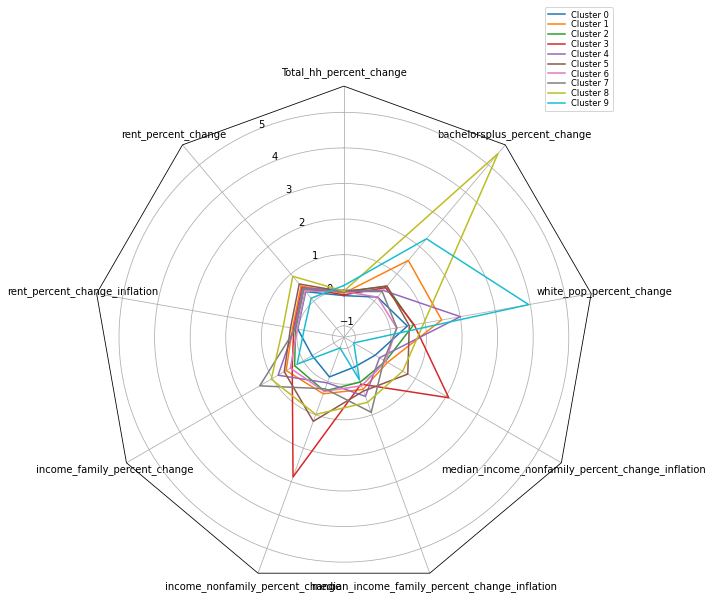

In [70]:
radar_plot (kmeans, variablesGdf2)

## Spatial Clustering

In [71]:
#from shapely.geometry import Polygon, LineString, Point

In [72]:
#variablesGdf_final['point'] = variablesGdf_final.centroid

In [73]:
#variablesGdf_final = variablesGdf_final.rename(columns={'geometry':'geometry1'})

In [74]:
#variablesGdf_final = variablesGdf_final.rename(columns={'point':'geometry'})

In [75]:
#variablesGdf_final.geometry

In [76]:
#variablesGdf_final['lon'] = variablesGdf_final['geometry'].x
#variablesGdf_final['lat'] = variablesGdf_final['geometry'].y

In [77]:
#variablesGdf_final.dropna(subset='lat', inplace=True)
#variablesGdf_final.dropna(subset='lon', inplace=True)

In [78]:
#variablesGdf_final

In [79]:
#variablesGdf_final = variablesGdf_final.drop(columns=['geometry1'])

In [80]:
#variablesGdf_final.plot()

In [81]:
#from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters=10, random_state=1).fit(variablesGdf_final[['lat','lon']])
#variablesGdf_final['cluster_id'] = kmeans.labels_
#variablesGdf_final.head()

In [82]:
#variablesGdf_final = variablesGdf_final.to_crs('EPSG:3857')

In [83]:
#import matplotlib.pyplot as plt
#import contextily as ctx

#fig, ax = plt.subplots(figsize=(10,10))
#variablesGdf_final.plot('cluster_id', categorical=True, legend=False, 
 #                                  ax=ax, alpha=0.4)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
#ax.set_title('Gentrification indicator clusters', fontsize=20)                           
#ax.set_ylim([3.98e6, 4.14e6])
#ax.set_xticks([])
#ax.set_yticks([])

## Cluster Round 3

In [84]:
#variablesGdf_final1 = variablesGdf_final.drop(columns={'name', 'geometry', 'GEOID', 'Typology', 'cluster_id', 'Typology_numeric', 'Typology_numeric2'})

In [85]:
#from sklearn.cluster import KMeans

In [86]:
#kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf_final1)
#print(kmeans)

In [87]:
#kmeans.labels_

In [88]:
#print(kmeans.labels_.shape)
#print(len(variablesGdf_final1))

In [89]:
#variablesGdf_final1['cluster_id'] = kmeans.labels_

In [90]:
#variablesGdf_final1.groupby('cluster_id').size()

In [91]:
#import numpy as np

#import matplotlib.pyplot as plt
#from matplotlib.patches import Circle, RegularPolygon
#from matplotlib.path import Path
#from matplotlib.projections.polar import PolarAxes
#from matplotlib.projections import register_projection
#from matplotlib.spines import Spine
#from matplotlib.transforms import Affine2D


#def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
 #   theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

  #  class RadarAxes(PolarAxes):

   #     name = 'radar'
        # use 1 line segment to connect specified points
    #    RESOLUTION = 1

     #   def __init__(self, *args, **kwargs):
      #      super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
       #     self.set_theta_zero_location('N')

        #def fill(self, *args, closed=True, **kwargs):
         #   """Override fill so that line is closed by default"""
          #  return super().fill(closed=closed, *args, **kwargs)

        #def plot(self, *args, **kwargs):
         #   """Override plot so that line is closed by default"""
          #  lines = super().plot(*args, **kwargs)
           # for line in lines:
            #    self._close_line(line)

        #def _close_line(self, line):
         #   x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
          #  if x[0] != x[-1]:
           #     x = np.append(x, x[0])
            #    y = np.append(y, y[0])
             #   line.set_data(x, y)

        #def set_varlabels(self, labels):
         #   self.set_thetagrids(np.degrees(theta), labels)

        #def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
         #   if frame == 'circle':
          #      return Circle((0.5, 0.5), 0.5)
          #  elif frame == 'polygon':
           #     return RegularPolygon((0.5, 0.5), num_vars,
            #                          radius=.5, edgecolor="k")
            #else:
             #   raise ValueError("Unknown value for 'frame': %s" % frame)

        #def _gen_axes_spines(self):
         #   if frame == 'circle':
          #      return super()._gen_axes_spines()
           # elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
            #    spine = Spine(axes=self,
             #                 spine_type='circle',
              #                path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
               # spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                #                    + self.transAxes)
                #return {'polar': spine}
            #else:
             #   raise ValueError("Unknown value for 'frame': %s" % frame)

    #register_projection(RadarAxes)
    #return theta

IndentationError: unexpected indent (3327360570.py, line 13)

In [92]:
#def radar_plot(kmeans, variablesGdf_final1):
 #   N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
  #  k = kmeans.n_clusters
   # theta = radar_factory(N, frame='polygon')
    #data = kmeans.cluster_centers_.T
    #spoke_labels = [col for col in variablesGdf_final1.columns if col!='cluster_id']
    #fig, ax = plt.subplots(figsize=(9, 9),
     #                           subplot_kw=dict(projection='radar'))
    #fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

  #  ax.plot(theta, data) #, color=color)
   # ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    #labels = ['Cluster {}'.format(kk) for kk in range(k)]
    #ax.legend(labels, loc=(0.9, .95),
     #                           labelspacing=0.1, fontsize='small')

In [93]:
#radar_plot (kmeans, variablesGdf_final1)

### Cluster Round 4 

In [94]:
variablesGdf_final['Westlake'] = variablesGdf_final['name']
variablesGdf_final['Pico-Union'] = variablesGdf_final['name']
variablesGdf_final['Koreatown'] = variablesGdf_final['name']
variablesGdf_final['Echo Park'] = variablesGdf_final['name']
variablesGdf_final['Downtown'] = variablesGdf_final['name']
variablesGdf_final['Silver Lake'] = variablesGdf_final['name']

In [95]:
variablesGdf_final['Westlake'] = variablesGdf_final['Westlake'].replace(['Westlake'],'1')
variablesGdf_final['Westlake'] = variablesGdf_final['Westlake'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [96]:
variablesGdf_final['Pico-Union'] = variablesGdf_final['Pico-Union'].replace(['Pico-Union'],'1')
variablesGdf_final['Pico-Union'] = variablesGdf_final['Pico-Union'].replace(['Westlake', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [97]:
variablesGdf_final['Koreatown'] = variablesGdf_final['Koreatown'].replace(['Koreatown'],'1')
variablesGdf_final['Koreatown'] = variablesGdf_final['Koreatown'].replace(['Pico-Union', 'Westlake', 'Echo Park',
                                                                        'Downtown', 'Silver Lake'], '0')

In [98]:
variablesGdf_final['Echo Park'] = variablesGdf_final['Echo Park'].replace(['Echo Park'],'1')
variablesGdf_final['Echo Park'] = variablesGdf_final['Echo Park'].replace(['Pico-Union', 'Koreatown', 'Westlake',
                                                                        'Downtown', 'Silver Lake'], '0')

In [99]:
variablesGdf_final['Downtown'] = variablesGdf_final['Downtown'].replace(['Downtown'],'1')
variablesGdf_final['Downtown'] = variablesGdf_final['Downtown'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Westlake', 'Silver Lake'], '0')

In [100]:
variablesGdf_final['Silver Lake'] = variablesGdf_final['Silver Lake'].replace(['Silver Lake'],'1')
variablesGdf_final['Silver Lake'] = variablesGdf_final['Silver Lake'].replace(['Pico-Union', 'Koreatown', 'Echo Park',
                                                                        'Downtown', 'Westlake'], '0')

In [101]:
variablesGdf_subset = variablesGdf_final[['name', 'geometry', 'GEOID', 'Typology', 'Typology_numeric', 
                                         'Typology_numeric2']]

In [102]:
variablesGdf_final1 = variablesGdf_final.drop(columns={'name', 'geometry', 'GEOID', 'Typology', 'cluster_id', 'Typology_numeric', 'Typology_numeric2'})

In [103]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf_final1)
print(kmeans)

KMeans(n_clusters=5, random_state=0)


In [104]:
print(kmeans.labels_.shape)
print(len(variablesGdf_final1))

(133,)
133


In [105]:
variablesGdf_final1['cluster_id'] = kmeans.labels_

In [106]:
variablesGdf_final1.groupby('cluster_id').size()

cluster_id
0    25
1    35
2    10
3    61
4     2
dtype: int64

In [107]:
def radar_plot(kmeans, variablesGdf_final1):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf_final1.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

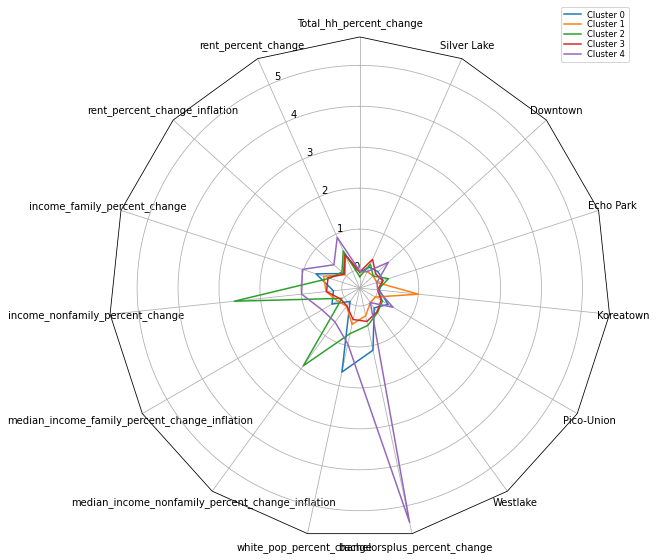

In [108]:
radar_plot (kmeans, variablesGdf_final1)

In [109]:
variablesGdf_final1 = variablesGdf_subset.join(variablesGdf_final1)

In [110]:
variablesGdf_final1

,name,geometry,GEOID,Typology,Typology_numeric,Typology_numeric2,Total_hh_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,...,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,Westlake,Pico-Union,Koreatown,Echo Park,Downtown,Silver Lake,cluster_id
0,Westlake,"POLYGON ((-118.27259 34.04308, -118.27243 34.0...",6.037210e+09,Advanced Gentrification,8.0,4.0,-0.090301,0.520134,0.120032,0.065907,...,0.367608,0.648831,0.916215,1,0,0,0,0,0,3
1,Westlake,"POLYGON ((-118.26652 34.04788, -118.26642 34.0...",6.037209e+09,Early/Ongoing Gentrification,5.0,3.0,-0.139194,0.270859,-0.063634,0.376511,...,-0.193537,-0.126527,0.011439,1,0,0,0,0,0,3
2,Westlake,"POLYGON ((-118.29051 34.07633, -118.29170 34.0...",6.037211e+09,Early/Ongoing Gentrification,5.0,3.0,0.003922,0.444040,0.063966,0.190279,...,0.061524,0.899744,0.113059,1,0,0,0,0,0,3
3,Westlake,"POLYGON ((-118.28442 34.07715, -118.28442 34.0...",6.037193e+09,Early/Ongoing Gentrification,5.0,3.0,0.060714,0.579470,0.163751,0.384261,...,0.899697,0.545329,0.577466,1,0,0,0,0,0,3
4,Westlake,"POLYGON ((-118.25966 34.06201, -118.25974 34.0...",6.037208e+09,At Risk of Gentrification,7.0,4.0,-0.051724,0.361851,0.003410,0.682266,...,2.403152,0.975671,0.734777,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Pico-Union,"POLYGON ((-118.28413 34.04184, -118.28414 34.0...",6.037221e+09,Low-Income/Susceptible to Displacement,4.0,2.0,-0.142857,0.191313,-0.122242,0.439254,...,1.859356,-0.411594,0.563381,0,1,0,0,0,0,2
129,Pico-Union,"POLYGON ((-118.28414 34.04729, -118.28534 34.0...",6.037221e+09,At Risk of Gentrification,7.0,4.0,0.096346,0.510638,0.113036,0.497703,...,-1.000000,0.270798,0.645893,0,1,0,0,0,0,3
130,Pico-Union,"POLYGON ((-118.27668 34.04519, -118.27651 34.0...",6.037210e+09,Advanced Gentrification,8.0,4.0,-0.110837,0.253197,-0.076647,0.688634,...,-0.233638,1.007048,0.903833,0,1,0,0,0,0,0
131,Pico-Union,"POLYGON ((-118.28041 34.04819, -118.28061 34.0...",6.037210e+09,At Risk of Gentrification,7.0,4.0,0.130435,0.458671,0.074746,0.181293,...,0.128524,0.229048,0.036598,0,1,0,0,0,0,3


Text(0.5, 1.0, 'Urban Displacement Project: Displacement Risk Index')

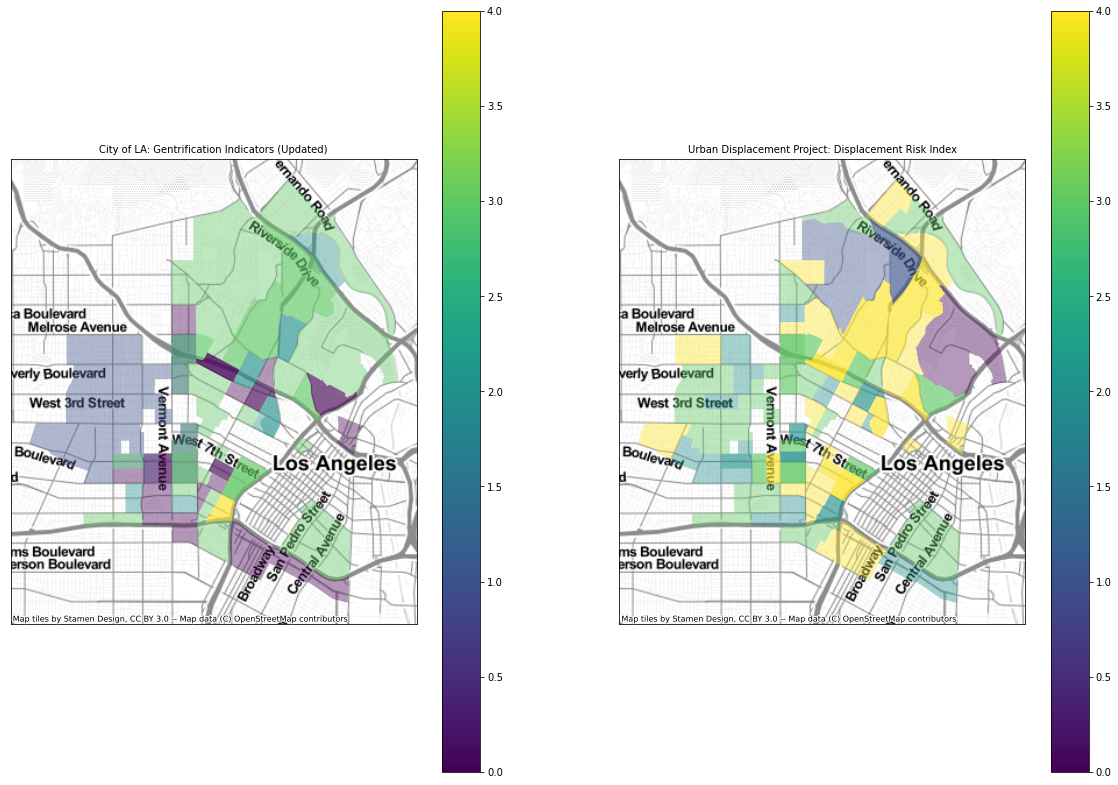

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(20, 14), sharex=True, sharey=True)

ax1, ax2 = axs

variablesGdf_final1.to_crs('EPSG:3857').plot('cluster_id', legend=True, ax = ax1, alpha=0.4)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('City of LA: Gentrification Indicators (Updated)', fontsize=10)


variablesGdf_final1.to_crs('EPSG:3857').plot('Typology_numeric2', legend=True, ax = ax2, alpha=0.4)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Urban Displacement Project: Displacement Risk Index', fontsize=10)

In [ ]:
## To Do - interpret whats happening based on radar plots 

In [112]:
variablesGdf_final1 = variablesGdf_final1.drop(columns={'cluster_id'})

In [114]:
variablesGdf_final1 = gpd.GeoDataFrame(variablesGdf_final1, geometry='geometry')

In [115]:
variablesGdf_final1.to_file('Full_variable_list_5.30.22.geojson', driver='GeoJSON')

/Users/micaobrien/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
